## Data Structure




### cluster particle data

The data of the Horizon run 5 simulation for our study has been split into various "clusters{snap}.hdf5" files where {snap} indicates the snapshot number of simulation. For example, the last snapshot at redshift of 0.625 is 296 for which the file name would be clusters296.hdf5. 

### cluster merger files

These are csv files containing the snapshot number and cluster id of the cluster at that snapshot.
It contains 8 columns, the following are of interest for the study: 

- time: Lookback time in Gyr
- snap: snapshot number of simulation
- HostHaloID: HostHaloID of the cluster at that snapshot
- ClusMass(Msun): Mass of the cluster at that epoch in solar mass.
- Massfraction: fraction of the final mass at that epoch


## Analysis

The <a>params.ini</a> sets the paths. Set the path of <b>outdir</b> to the location of hdf5 files.

You can make the use of HR5_module.py to make the analysis. It contains the functions and classes used to perform the analysis.
In the following we will see the functions available for analysis.

In [1]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
# Get all the IDs of clusters present at the given snapshot
snapshot=296

# Let s define the instance of the class Cluster with the snapshot
clus296 = pd.read_csv('../Data/groups5e13.csv')

clus296.columns

Index(['HostHaloID', 'HostMtot(Msun)'], dtype='object')

In [3]:
# These are the list IDs of the clusters
cluslist = clus296['HostHaloID'].tolist()
print(cluslist)
# Lets pick 10th cluster in the list
clusid = cluslist[10]


[1561636, 1581385, 1664541, 1758257, 1808858, 1827559, 1847383, 1954735, 1983863, 2002628, 2013898, 2071135, 2199507, 2227715, 2246014, 2290169, 2290206, 2507502, 2592446, 2623756, 2734822, 2885792, 2892837, 2937863, 2944981, 3016893, 3069850, 3094112, 3178107, 3200641, 3226680, 3259117, 3284456, 3355500, 3359016, 3540174, 3651767, 3672299, 3689051, 3700933, 3744183, 3748260, 3780410, 3811219, 3882383, 3889787, 3929760, 3929767, 3929805, 3933724, 3945090, 4040811, 4063505, 4068321, 4081915, 4083100, 4147752, 4195553, 4226110, 4289749, 4309863, 4328263, 4415004, 4465008, 4465020, 4477204, 4481843, 4481851, 4549606, 4560890, 4617549, 4622511, 4658833, 4658856, 4714730, 4827650, 4838809, 4899516, 4901245, 4921745, 4966761, 4968706, 5011121, 5028157, 5033760, 5044774, 5049205, 5208836, 5259095, 5265012, 5332403, 5358495, 5375604, 5409575, 5462023, 5493185, 5520106, 5548455, 5573913, 5634590, 5638753, 5699819, 5715147, 5753402, 5816171, 5871163, 5884858, 5957816, 5960768, 5979633, 6143068, 

In [4]:
# Initialize the class instance with the given `snapno` and `clusno`
# The instance will contain all the information of the cluster and functions for further # processing
clus = hr5.Cluster(snapshot,clusid)


In [5]:
# list all the functions and variables for the clus instance by dir(clus)
# the items with  __  are private and can t be accessed, others are public
# we get only public attributes

# Get the list of all attributes and functions of the clus object
all_attributes = dir(clus)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)


['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_ngas', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'f', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'save_yt_dataset', 'snap']


Attributes are the functions and variables that can be accessed using clus.{attribute_name} where {attribute_name} is the 
name of the attribute. We explain all the varible and functions:

- bcgid: galaxy id of the most massive galaxy
- clusID: cluster id at the snapshot
- clus_mdm: total dark matter mass of the cluster
- clus_mgas: total gas mass of the cluster
- clus_msink: total sink particle mass of cluster 
- clus_mstar: total stellar mass of cluster
- clus_mtot: total mass of the cluster
- clus_ngas: total number of gas particles in cluster 
- clus_nsink: total number of sink particles in cluster
- clus_nstar: total number of star particles in cluster
- clus_nsub: total number of subhalos (galaxies) cluster
- clus_pos: position of cluster in cMpc in the simulation
- clus_vel: velocity of the cluster in km/s 
- f: excess to the raw hdf5 file
- get_all_parts: function to get all particles of a type in cluster
- get_alldat_gal: get all data for a galaxy
- get_galids: get all galaxy ids in a cluster
- save_yt_dataset: get yt dataset for a cluster
- snap: snapshot number 

In [6]:
# You can also get explaination of the attributes and functions using ? or ??
clus.get_galids?


Signature: clus.get_galids()
Docstring:
Returns a list of galaxy IDs from the `self.f` dictionary that corresponds to the cluster with ID `self.clusID`.

:return: A list of galaxy IDs.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [7]:
# Get all ids galaxies in the cluster

gal_list = clus.get_galids()

# print first 10
print(gal_list[:10])



['2087002', '2087003', '2087004', '2087005', '2087006', '2087007', '2087008', '2087009', '2087010', '2087011']


In [8]:
# get all particles of type 'star' in the cluster we can use get_all_parts

clus.get_all_parts?

Signature: clus.get_all_parts(partype)
Docstring:
This function returns an instance of the Galaxy class containing all parts of the specified type.

Args:
    partype (str): The type of part to retrieve.

Returns:
    Galaxy: An instance of the Galaxy class containing all parts of the specified type.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [9]:
# get all stellar particles it returns a Galaxy object but this only contains
# the sttributes for stellar particles and others are empty

stars = clus.get_all_parts('star')

Processing galaxy 2087002
Processing galaxy 2087003
Processing galaxy 2087004
Processing galaxy 2087005
Processing galaxy 2087006
Processing galaxy 2087007
Processing galaxy 2087008
Processing galaxy 2087009
Processing galaxy 2087010
Processing galaxy 2087011
Processing galaxy 2087012
Processing galaxy 2087013
Processing galaxy 2087014
Processing galaxy 2087015
Processing galaxy 2087016
Processing galaxy 2087017
Processing galaxy 2087018
Processing galaxy 2087019
Processing galaxy 2087020
Processing galaxy 2087021
Processing galaxy 2087022
Processing galaxy 2087023
Processing galaxy 2087024
Processing galaxy 2087025
Processing galaxy 2087026
Processing galaxy 2087027
Processing galaxy 2087028
Processing galaxy 2087029
Processing galaxy 2087030
Processing galaxy 2087031
Processing galaxy 2087032
Processing galaxy 2087033
Processing galaxy 2087034
Processing galaxy 2087035
Processing galaxy 2087036
Processing galaxy 2087037
Processing galaxy 2087038
Processing galaxy 2087039
Processing g

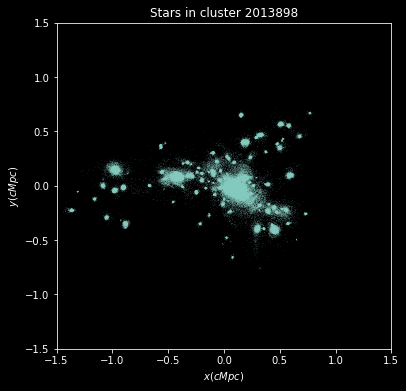

In [35]:
# We can plot these stars

star_pos = stars.star_pos_com

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$x(cMpc)$')
ax.set_ylabel(r'$y(cMpc)$')
ax.scatter(star_pos[:,0],star_pos[:,1],s=0.001)
ax.set_title(f"Stars in cluster {clusid}")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)

plt.show()

In [10]:
# we can use function get_allgal_data to get all the data of the galaxies in the cluster
# let's see the inputs

clus.get_alldat_gal?

Signature: clus.get_alldat_gal(galist)
Docstring:
This function takes in a list of galaxy IDs or a single galaxy ID and returns a Galaxy object or a list of Galaxy objects respectively. 

Args:
- galist (list or int): A list of galaxy IDs or a single galaxy ID.

Returns:
- outgal (list): A list of Galaxy objects if galist is a list.
- gal (Galaxy object): A Galaxy object if galist is an int.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [11]:
# Lets choose galaxy no 1 from the gal_list and run the function

galid = gal_list[0]

gal = clus.get_alldat_gal(galid)

Processing galaxy 2087002


In [12]:
# gal is a Galaxy object that has it's own attributes
# lets see the attributes

# Get the list of all attributes and functions of the gal object
all_attributes = dir(gal)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)

['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_ngas', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'dm_mass', 'dm_pos', 'dm_pos_com', 'dm_vel', 'f', 'galID', 'gal_mdm', 'gal_mgas', 'gal_msink', 'gal_mstar', 'gal_mtot', 'gal_ngas', 'gal_nsink', 'gal_nstar', 'gal_pos', 'gal_vel', 'gas_fe', 'gas_h', 'gas_mass', 'gas_o', 'gas_pos', 'gas_pos_com', 'gas_t', 'gas_vel', 'gas_z', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'rcom_dm', 'rcom_gas', 'rcom_star', 'save_yt_dataset', 'snap', 'star_mass', 'star_pos', 'star_pos_com', 'star_vel', 'star_z']


Galaxy object takes it's inheritense from the Cluster class therefore contains all the parameters available for Class 
are available plus extra few. We explain them below:


- dm_mass: array of dark matter mass : size (gal_ndm)
- dm_pos: array of dark matter position size: (gal_ndm,3)
- dm_pos_com: array of dark matter position in center of mass size: (gal_ndm,3)
- dm_vel: array of dark matter velocity size: (gal_ndm,3)
- galID: galaxy ID
- gal_mdm: total dark matter mass of galaxy
- gal_mgas: total gas mass of galaxy
- gal_msink: total sink mass of galaxy
- gal_mstar: total stellar mass of galaxy
- gal_mtot: total mass of galaxy
- gal_ngas: total number of gas particles in galaxy
- gal_nsink: total number of sink particles in galaxy
- gal_nstar: total number of stellar particles in galaxy
- gal_pos: galaxy position size: 3
- gal_vel: array of gas particle velocity size: 3
- gas_fe: array of fe size: (gal_ngas)
- gas_h: array of h size: (gal_ngas)
- gas_mass: array of gas particle mass : size (gal_gas)
- gas_o: array of o size: (gal_ngas)
- gas_pos: array of gas particle position size: (gal_ngas,3)
- gas_pos_com: array of gas particle position in center of mass size: (gal_ngas,3)
- gas_t: array of gas temperature size: (gal_ngas)
- gas_vel: array of gas particle velocity size: (gal_ngas,3)
- gas_z: array of gas metallicity size: (gal_ngas)
- rcom_dm: array of dark matter particle distances from origin in COM frame: (gal_ndm)
- rcom_gas: array of gas particle distances from origin in COM frame: (gal_ngas)
- rcom_star: array of stellar particle distances from origin in COM frame: (gal_nstar)
- star_mass: array of stellar particle mass: (gal_nstar)
- star_pos: array of stellar particle position size: (gal_nstar,3)
- star_pos_com: array of stellar particle position in COM frame size: (gal_nstar,3)
- star_vel: array of stellar particle velocity size: (gal_nstar,3)
- star_z: array of stellar particle metallicty size: (gal_nstar)


In [13]:
# You can also choose a list of galaxies and run the function
# lets choose first 5 galaxies from gal_list
galxs = gal_list[:5]

galout = clus.get_alldat_gal(galxs)

Processing galaxy 2087002
Processing galaxy 2087003
Processing galaxy 2087004
Processing galaxy 2087005
Processing galaxy 2087006


In [14]:
# galout now contains the list of galaxy object which contains the
# the all the attributes above

galout

In [37]:
# To get for example the position of dark matter in COM frame
# for galaxy 2087002 (gal) defined above this is a array of size (ndm,3)
dmcom = gal.dm_pos_com

print(dmcom.shape)

(144, 3)


The Module also allows us to get the data for the cluster in the <b>YT package</b> dataset.
[YT Project](https://yt-project.org/) is used for analysis of simulations and has a variety of functions that are readily available. The dataset is saved as generic particle dataset.


In [38]:
clus.save_yt_dataset?

Signature: clus.save_yt_dataset(clusID)
Docstring:
Saves the yt dataset of the BCG, ICM, and rest of the galaxies.

Parameters:
-----------
clusID: int
    Unique identifier of the cluster.


Returns:
--------
ds_all: yt dataset
    Dataset containing all the particles.
ds_rest: yt dataset
    Dataset containing the rest of the galaxies particles.
ds_bcg: yt dataset
    Dataset containing the BCG particles.
ds_icm: yt dataset
    Dataset containing the ICM particles.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [40]:
ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(snapshot)


Processing galaxy 2087008
Processing galaxy 2087002
Processing galaxy 2087003
Processing galaxy 2087004
Processing galaxy 2087005
Processing galaxy 2087006
Processing galaxy 2087007
Processing galaxy 2087008
Processing galaxy 2087009
Processing galaxy 2087010
Processing galaxy 2087011
Processing galaxy 2087012
Processing galaxy 2087013
Processing galaxy 2087014
Processing galaxy 2087015
Processing galaxy 2087016
Processing galaxy 2087017
Processing galaxy 2087018
Processing galaxy 2087019
Processing galaxy 2087020
Processing galaxy 2087021
Processing galaxy 2087022
Processing galaxy 2087023
Processing galaxy 2087024
Processing galaxy 2087025
Processing galaxy 2087026
Processing galaxy 2087027
Processing galaxy 2087028
Processing galaxy 2087029
Processing galaxy 2087030
Processing galaxy 2087031
Processing galaxy 2087032
Processing galaxy 2087033
Processing galaxy 2087034
Processing galaxy 2087035
Processing galaxy 2087036
Processing galaxy 2087037
Processing galaxy 2087038
Processing g

yt : [INFO     ] 2023-06-15 20:48:51,140 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 20:48:51,141 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-06-15 20:48:51,142 Parameters: domain_left_edge          = [-0.2 -0.2 -0.2]
yt : [INFO     ] 2023-06-15 20:48:51,144 Parameters: domain_right_edge         = [0.2 0.2 0.2]
yt : [INFO     ] 2023-06-15 20:48:51,145 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2023-06-15 20:48:51,150 Allocating for 3.765e+06 particles (index particle type 'all')
yt : [INFO     ] 2023-06-15 20:48:51,493 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 20:48:51,494 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-06-15 20:48:51,494 Parameters: domain_left_edge          = [-0.4 -0.4 -0.4]
yt : [INFO     ] 2023-06-15 20:48:51,495 Parameters: domain_right_edge         = [0.4 0.4 0.4]
yt : [INFO     ] 2023-06-15 20:48:51,496 Parameters: cosmological_simulation 

In [41]:
# We can now use these dataset for analysis of all galaxies, central galaxies and ICM
# These dataset contain all the information as fields of diffent particles
# Check all the fields of ds_all

ds_all.field_list

[('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('dm', 'particle_mass'),
 ('dm', 'particle_position_x'),
 ('dm', 'particle_position_y'),
 ('dm', 'particle_position_z'),
 ('gas', 'fe'),
 ('gas', 'h'),
 ('gas', 'o'),
 ('gas', 'particle_mass'),
 ('gas', 'particle_position_x'),
 ('gas', 'particle_position_y'),
 ('gas', 'particle_position_z'),
 ('gas', 't'),
 ('gas', 'z'),
 ('star', 'particle_mass'),
 ('star', 'particle_position_x'),
 ('star', 'particle_position_y'),
 ('star', 'particle_position_z'),
 ('star', 'z')]

In [42]:
# there are also extra fields in ds_all that yt generates for us

ds_all.derived_field_list

[('all', 'mesh_id'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radius'),
 ('all', 'particle_spherical_position_phi'),
 ('all', 'particle_spherical_position_radius'),
 ('all', 'particle_spherical_position_theta'),
 ('all', 'relative_particle_position'),
 ('all', 'relative_particle_position_x'),
 ('all', 'relative_particle_position_y'),
 ('all', 'relative_particle_position_z'),
 ('deposit

Full details of all the capabilities of yt are given here [plotting with yt](https://yt-project.org/doc/visualizing/plots.html)

Just to do a demonstration we plot a projection plot of stellar paticle mass



yt : [INFO     ] 2023-06-15 20:56:10,368 xlim = -1.800000 1.800000
yt : [INFO     ] 2023-06-15 20:56:10,369 ylim = -1.800000 1.800000
yt : [INFO     ] 2023-06-15 20:56:10,370 xlim = -1.800000 1.800000
yt : [INFO     ] 2023-06-15 20:56:10,371 ylim = -1.800000 1.800000
yt : [INFO     ] 2023-06-15 20:56:10,372 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: Matplotli


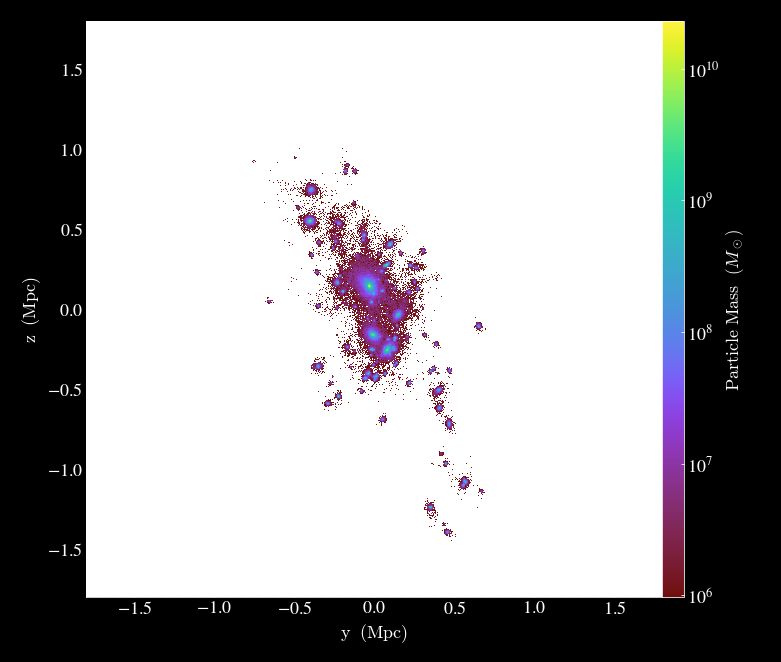

In [46]:
import yt 

prj = yt.ParticleProjectionPlot(ds_all,'x',("star","particle_mass"))

prj.set_unit(("star","particle_mass"), "Msun")
                